In [1]:
from PyEMD import EEMD
import numpy as np
import pylab as plt
import pandas as pd

In [2]:
S = np.loadtxt('20181109_Read.csv', delimiter=',', dtype='float', skiprows=1, unpack=True)
t = np.arange(len(S))

In [3]:
# Assign EEMD to `eemd` variable
eemd = EEMD()

In [4]:
# Say we want detect extrema using parabolic method
emd = eemd.EMD
emd.extrema_detection="parabol"

In [5]:
# Execute EEMD on S
#eIMFs = eemd.eemd(S, t)
eIMFs = eemd.eemd(S)
nIMFs = eIMFs.shape[0]

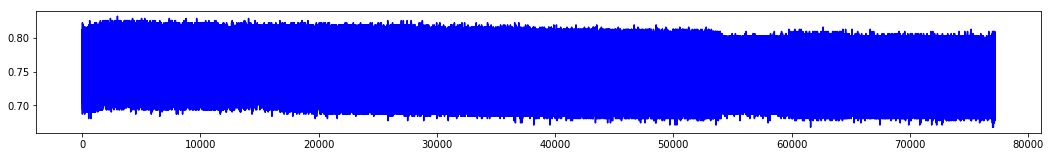

In [7]:
# Plot results
plt.figure(figsize=(18,40)) #(12,9)
plt.subplot(nIMFs+1, 1, 1)
plt.plot(t, S, 'b')

In [8]:
eIMFs.shape

(14, 77221)

In [9]:
eIMFs

array([[-2.73981901e-02,  2.37031748e-02,  2.32624634e-02, ...,
        -1.58317592e-02, -4.94174978e-02, -1.37897857e-02],
       [-1.47294736e-02, -9.72803869e-03, -6.70396264e-03, ...,
         2.56294966e-02,  2.42024973e-02,  2.08661900e-02],
       [-2.76812810e-03, -2.62917351e-03, -1.41014093e-03, ...,
        -2.63505186e-03, -9.23288527e-04,  3.56317285e-04],
       ...,
       [-1.73283827e-03, -1.73312823e-03, -1.73341659e-03, ...,
         2.15172567e-06,  2.03833258e-06,  1.92442661e-06],
       [ 3.25510745e-01,  3.25510814e-01,  3.25510882e-01, ...,
         3.18632569e-01,  3.18632628e-01,  3.18632688e-01],
       [ 4.32172696e-01,  4.32172740e-01,  4.32172785e-01, ...,
         4.22613949e-01,  4.22613959e-01,  4.22613968e-01]])

In [10]:
nIMFs

14

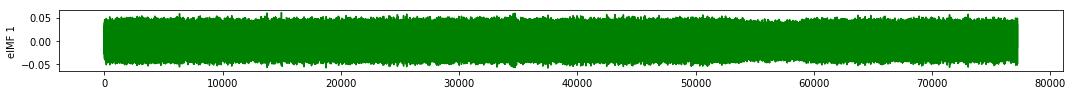

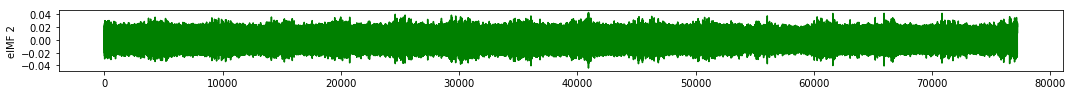

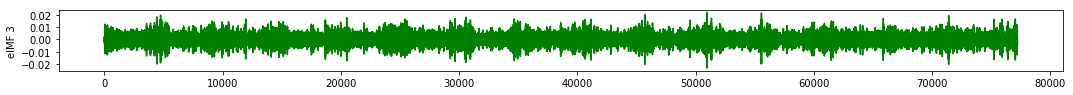

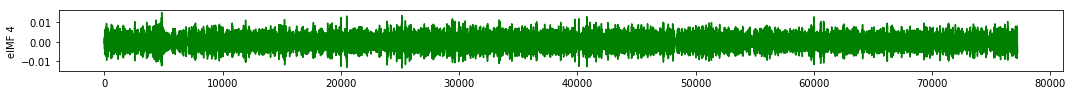

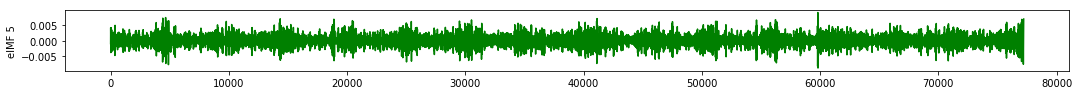

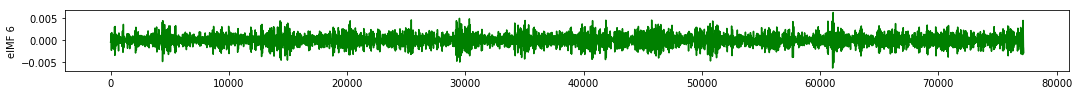

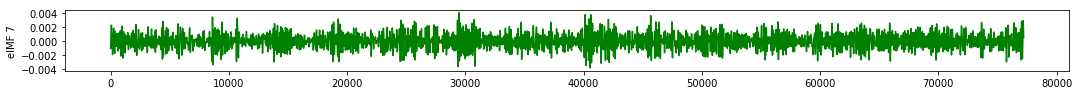

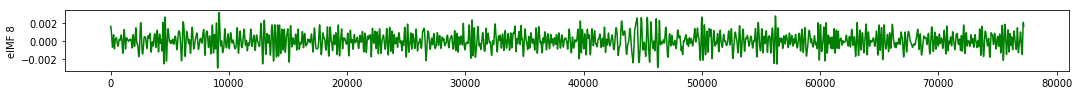

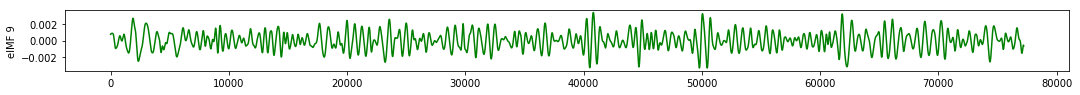

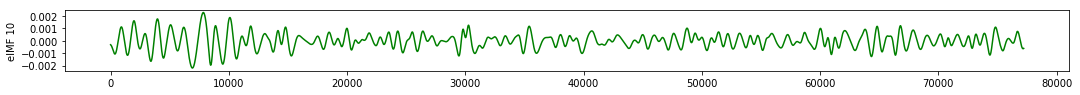

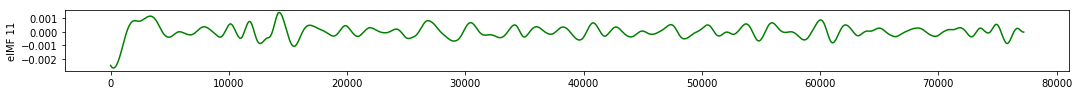

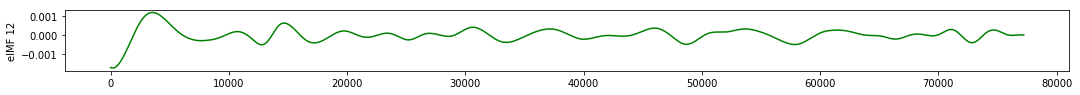

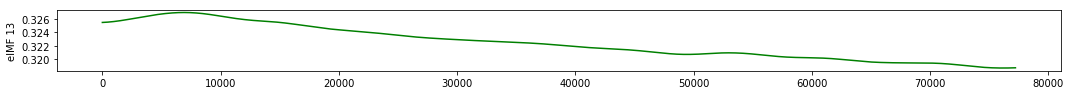

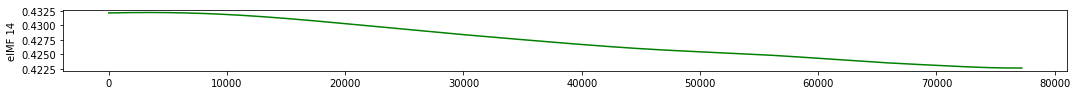

In [11]:
for n in range(nIMFs):
    plt.figure(figsize=(18,20)) #(12,9)
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t, eIMFs[n], 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

In [13]:
nFiltered = int(0.8*nIMFs)
filteredS = [sum(x) for x in zip(*eIMFs[range(1)])]
np.savetxt("filteredS_read.csv", filteredS, delimiter=",")